In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing dataset
dataset=pd.read_csv("balaji_Sales.csv")

In [4]:
# displaying data
dataset.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [5]:
dataset.shape

(1000, 10)

In [6]:
# checking if any null value is present
dataset.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [7]:
# checking if dulplicate value is present
dataset.duplicated().sum()

np.int64(0)

In [8]:
# filling the null field of transaction type
dataset["transaction_type"]=dataset["transaction_type"].fillna("online")

In [9]:
# replacing Mr and Mrs with male and female for better understanding
dataset["received_by"]=dataset["received_by"].replace(["Mr.","Mrs."],["Male","Female"])

In [10]:
# more info about the dataset to get more insights
dataset.isna().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [11]:
dataset["Date"]=pd.to_datetime(dataset["date"],format="mixed")

In [14]:
dataset.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,Date
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,online,Male,Night,2022-07-03
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Male,Afternoon,2022-08-23
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Male,Afternoon,2022-11-20
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Male,Night,2023-02-03
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Male,Evening,2022-10-02
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Male,Evening,2022-11-14
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Male,Evening,2022-05-03
7,8,12/22/2022,Panipuri,Fastfood,20,14,280,Online,Male,Night,2022-12-22
8,9,06-10-2022,Panipuri,Fastfood,20,1,20,Cash,Female,Morning,2022-06-10
9,10,9/16/2022,Panipuri,Fastfood,20,5,100,Online,Male,Afternoon,2022-09-16


Analysing Data

Univariate analysis

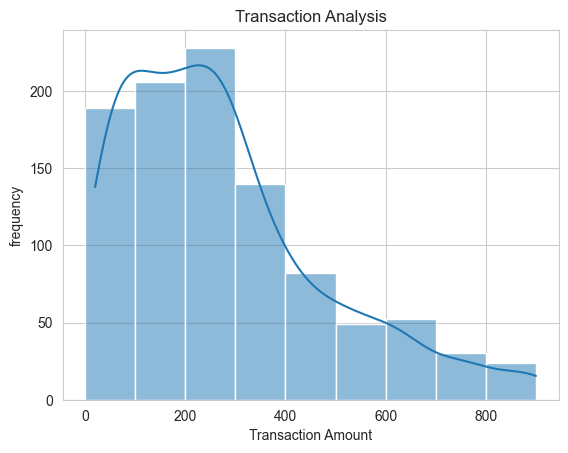

In [15]:
sns.set_style("whitegrid")
sns.histplot(dataset["transaction_amount"],bins=np.arange(0,1000,100),kde=True)
plt.title("Transaction Analysis")
plt.xlabel("Transaction Amount")
plt.ylabel("frequency")
plt.show()

This clearly shows that the maximum transaction amount has been spend by people is within 400 rupees since the frequency of transaction amount is high    


In [17]:
dataset["item_type"].unique()

array(['Fastfood', 'Beverages'], dtype=object)

In [20]:
# grouping the data based on item_type and calculating average of item_price
itemsType_price=dataset.groupby("item_type")["item_price"].mean()
print(itemsType_price)

item_type
Beverages    32.691083
Fastfood     33.600583
Name: item_price, dtype: float64


In [21]:
# looking for item type which is sold most
sorted_data1=dataset.groupby("item_type").agg({"quantity":"sum","transaction_amount":"sum"})
# this will tell which
Fastfood_type=dataset[dataset["item_type"]=='Fastfood']
Beverages_type=dataset[dataset["item_type"]=='Beverages']
Fastfood_data=Fastfood_type.groupby('item_name').agg({'quantity': 'sum', 'transaction_amount': 'sum'})
Beverages_data=Beverages_type.groupby('item_name').agg({'quantity': 'sum', 'transaction_amount': 'sum'})

In [22]:
item_price_fast=Fastfood_type.groupby('item_name')['item_price'].mean()
print(item_price_fast)

item_name
Aalopuri    20.0
Frankie     50.0
Panipuri    20.0
Sandwich    60.0
Vadapav     20.0
Name: item_price, dtype: float64


In [23]:
item_price_bev=Beverages_type.groupby('item_name')['item_price'].mean()
print(item_price_bev)

item_name
Cold coffee        40.0
Sugarcane juice    25.0
Name: item_price, dtype: float64


In [ ]:
plt.bar(sorted_data1.index,sorted_data1['quantity'])
plt.title('Total amount of order vs item_type')
plt.xlabel('Item Type')
plt.ylabel('Quantity of Order')
plt.show()